### OBJECTIVE: TECHNICAL ANALYSIS of a Car company
   Conducting a comprehensive technical analysis on a dataset pertaining to a car company with the aim of extracting valuable insights for a marketing campaign. Our approach involves performing extensive data analysis, encompassing exploratory data analysis (EDA) with univariate, bivariate, and multivariate techniques, along with utilizing various plots to derive meaningful observations from the data.

#### Following Analysis will be done -
1) Technical information about the dataset and discrepencies present in data.  
2) Univariate analysis for Features exploration drawing insights for business.  
3) Multivariate analysis to Understand the relationships among the variables to gain deeper insights.  
4) Identify patterns in the buyers groups and purchase history which can help to develop an improved Marketing strategy.

In [176]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [177]:
df=pd.read_csv('ABCMotors_CSV.csv')
df.head(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [178]:
df.shape

(1581, 14)

In [179]:
df.info()

#Total No. of Observations or Rows : 1581
#Total number of Features (No. of columns) : 14
#Two features-'Gender' and 'Partner_salary' have 56 (3.5%) and 106 null values respectively that need to be addressed before further analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


### Univariate Analysis

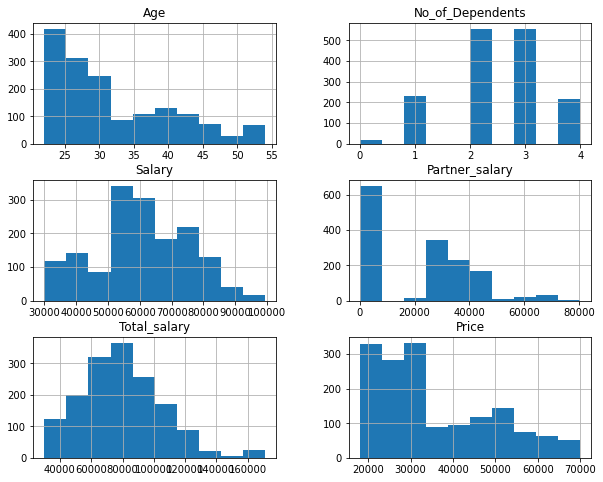

In [180]:
# Histogram
df.hist(figsize=(10,8));

### Checking the Normality of the Data

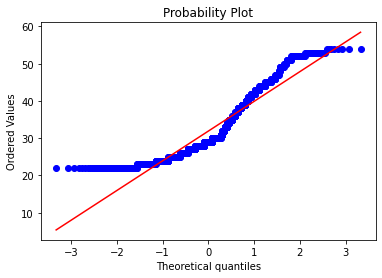

In [181]:
import pylab
import scipy.stats as stats

# Plotting the probability plot
stats.probplot(df['Age'],dist="norm", plot=pylab)
pylab.show()

#> Not Normal

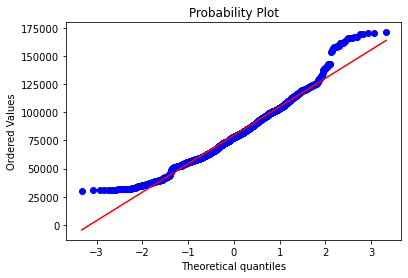

In [182]:
import pylab
import scipy.stats as stats

# Plotting the probability plot
stats.probplot(df['Total_salary'],dist="norm", plot=pylab)
pylab.show()
#> ~Normal 

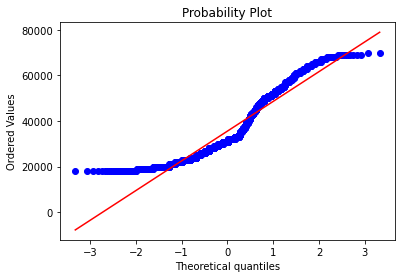

In [183]:
import pylab
import scipy.stats as stats


# Plotting the probability plot
stats.probplot(df['Price'],dist="norm", plot=pylab)
pylab.show()
#> Not Normal

In [184]:
# Identifying Missing Values

df.isna().sum()
#> Gender:53 ,Partner_salary 106  Nulls

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

### Missing Values Imputation

In [185]:
df['Partner_salary']= df[['Partner_salary']].apply(lambda x: np.where (df.Partner_working== 'No', x.fillna(0),  x))

for i in df.columns:
    print(i,df[i].isna().sum())

#> Replacing the null values of the Partner_salary to 0 in which the Partner is NOT working (90 entries) 
#> The null values of Partner salaries reduced from 106 to 16 only.
#> we will replace the remaining null values in the Partner_salary by mean Partner_salary
   

Age 0
Gender 53
Profession 0
Marital_status 0
Education 0
No_of_Dependents 0
Personal_loan 0
House_loan 0
Partner_working 0
Salary 0
Partner_salary 16
Total_salary 0
Price 0
Make 0


In [186]:
df['Partner_salary']= df[['Partner_salary']].apply(lambda x: np.where (df.Partner_working== 'Yes', x.fillna(df['Partner_salary'].mean()),  x))
#> Remaining partner_salaries null values replaced with the mean. 

#> Dropping the rows with null values in the Gender
df.dropna(inplace=True)

for i in df.columns:
    print(i,df[i].isna().sum())


Age 0
Gender 0
Profession 0
Marital_status 0
Education 0
No_of_Dependents 0
Personal_loan 0
House_loan 0
Partner_working 0
Salary 0
Partner_salary 0
Total_salary 0
Price 0
Make 0


In [187]:
df.info()

#> Finally No Null values in the dataSet and 1528 total observations (Rows) in the dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1528 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1528 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1528 non-null   object 
 3   Marital_status    1528 non-null   object 
 4   Education         1528 non-null   object 
 5   No_of_Dependents  1528 non-null   int64  
 6   Personal_loan     1528 non-null   object 
 7   House_loan        1528 non-null   object 
 8   Partner_working   1528 non-null   object 
 9   Salary            1528 non-null   int64  
 10  Partner_salary    1528 non-null   float64
 11  Total_salary      1528 non-null   int64  
 12  Price             1528 non-null   int64  
 13  Make              1528 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 179.1+ KB


In [188]:
#> Analysing the "Gender" Column as it's having 4 unique values (Expected = 2)
df.Gender.unique()
#> We find typo errors'Femal' and 'Femle' instead of 'Female'

array(['Male', 'Femal', 'Female', 'Femle'], dtype=object)

In [189]:
#> converting the errors in the Gender col.
df['Gender'].replace('Femal', 'Female', inplace=True)
df['Gender'].replace('Femle', 'Female', inplace=True)

In [190]:
print(df['Gender'].describe(include='all').T)
print("\n",df['Gender'].unique())
#> The errors in the Gender column has been replaced with correct values.

count     1528
unique       2
top       Male
freq      1199
Name: Gender, dtype: object

 ['Male' 'Female']


In [191]:
df.describe(include='all').T

#> Dataset READY for analysis >

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1528.0,NaN,NaN,NaN,32.013743,8.45167,22.0,25.0,29.0,38.0,54.0
Gender,1528,2,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1528,2,Salaried,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1528,2,Married,1395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1528,2,Post Graduate,951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1528.0,NaN,NaN,NaN,2.448953,0.943741,0.0,2.0,2.0,3.0,4.0
Personal_loan,1528,2,Yes,768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1528,2,No,1018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1528,2,Yes,838,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1528.0,NaN,NaN,NaN,60453.403141,14682.669181,30000.0,51900.0,59500.0,72000.0,99300.0


### Bivariate Analysis

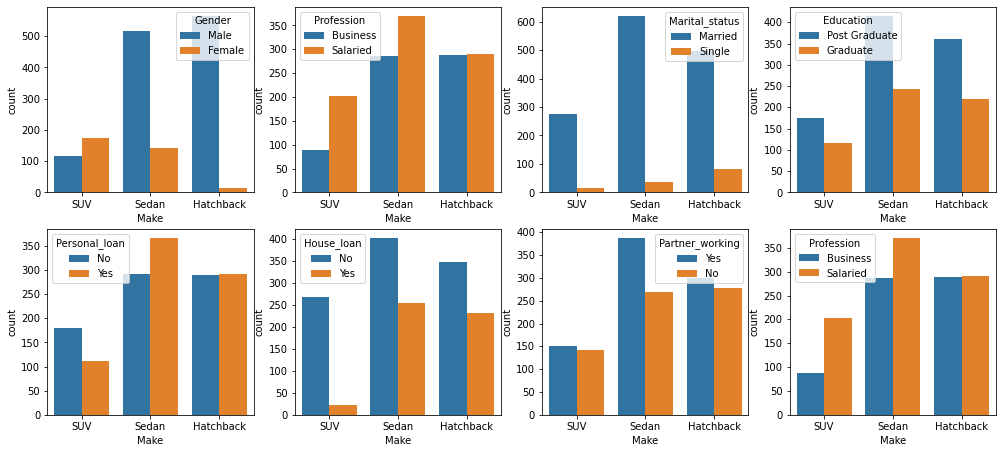

In [192]:
fig, axes = plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(17,7.5)

sns.countplot(x='Make',hue='Gender',data=df,ax=axes[0][0]);
sns.countplot(x='Make',hue='Profession',data=df,ax=axes[0][1]);
sns.countplot(x='Make',hue='Marital_status',data=df,ax=axes[0][2]);
sns.countplot(x='Make',hue='Education',data=df,ax=axes[0][3]);
sns.countplot(x='Make',hue='Personal_loan',data=df,ax=axes[1][0]);
sns.countplot(x='Make',hue='House_loan',data=df,ax=axes[1][1]);
sns.countplot(x='Make',hue='Partner_working',data=df,ax=axes[1][2]);
sns.countplot(x='Make',hue='Profession',data=df,ax=axes[1][3]);
plt.show()



Observations(Bivatriate Analysis)
1. Gender:      Males usually prefer Sedan and Hatchback ; Females prefer SUV and Sedan more , not prefer Hatchback
2. Profession:  Similar choise for make - least preferred: SUV ; Sedan and Hatchback : Almost equally preferred. 
   Salaried persons are bigger market for cars than B'ness persons.
3. Marital_status: Married persons prefer Sedan  whereas singles prefer Hatchback , dont prefer SUV.
4. Education:      Similar choice of Post graduate and Graduates; Sedan is most prefered make.
5. Personal_loan:  SUV Least prefered, Sedan most prefered
6. House_loan:     SUV not prefered by persons with House loan, Sedan most prefered by both
7. Partner_working:SUV Least prefered, Sedan most prefered

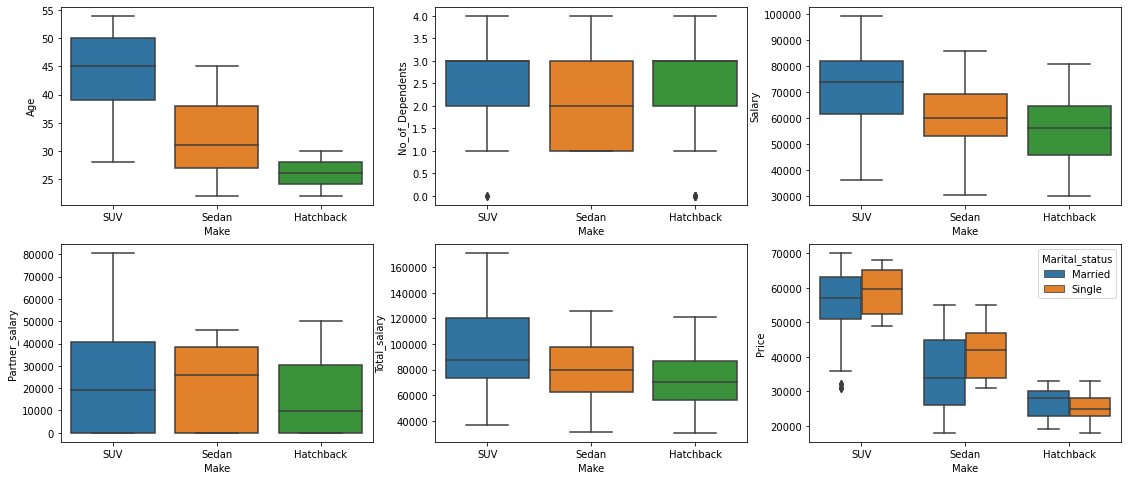

In [193]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(19,8)
sns.boxplot(x='Make',y='Age',data=df,ax=axes[0][0]);
sns.boxplot(x='Make',y='No_of_Dependents',data=df, ax=axes[0][1]);
sns.boxplot(x='Make',y='Salary',data=df, ax=axes[0][2]);
sns.boxplot(x='Make',y='Partner_salary',data=df, ax=axes[1][0]);
sns.boxplot(x='Make',y='Total_salary',data=df, ax=axes[1][1]);
sns.boxplot(x='Make',y='Price',hue='Marital_status',data=df, ax=axes[1][2]);
plt.show()


Observations
1. AGE Factor:  The make preference changes with Age - Younger age group (18-30):Hatchback ; 28-45:Sedan & 30-55:SUV.
2. No of Dependents: Almost 75% of total sales for each make is made to customers with 1-3 dependents, Sedan being more prefered by customers with 1-2 dependents.
   Bachelors do not prefer sedan.They either opt for SUV or Hatchback
3. Salary:   Higher salary people prefer SUV ; Lower salary group prefers Hatchback
4. Partner_salary : customers with low Partner salary prefer to go for Hatchback (evident from the lower median for hatchback)
5. Total_salary : ~ Salary
6. Price : SUVs are the most expensive make followed by Sedan and Hatchback 

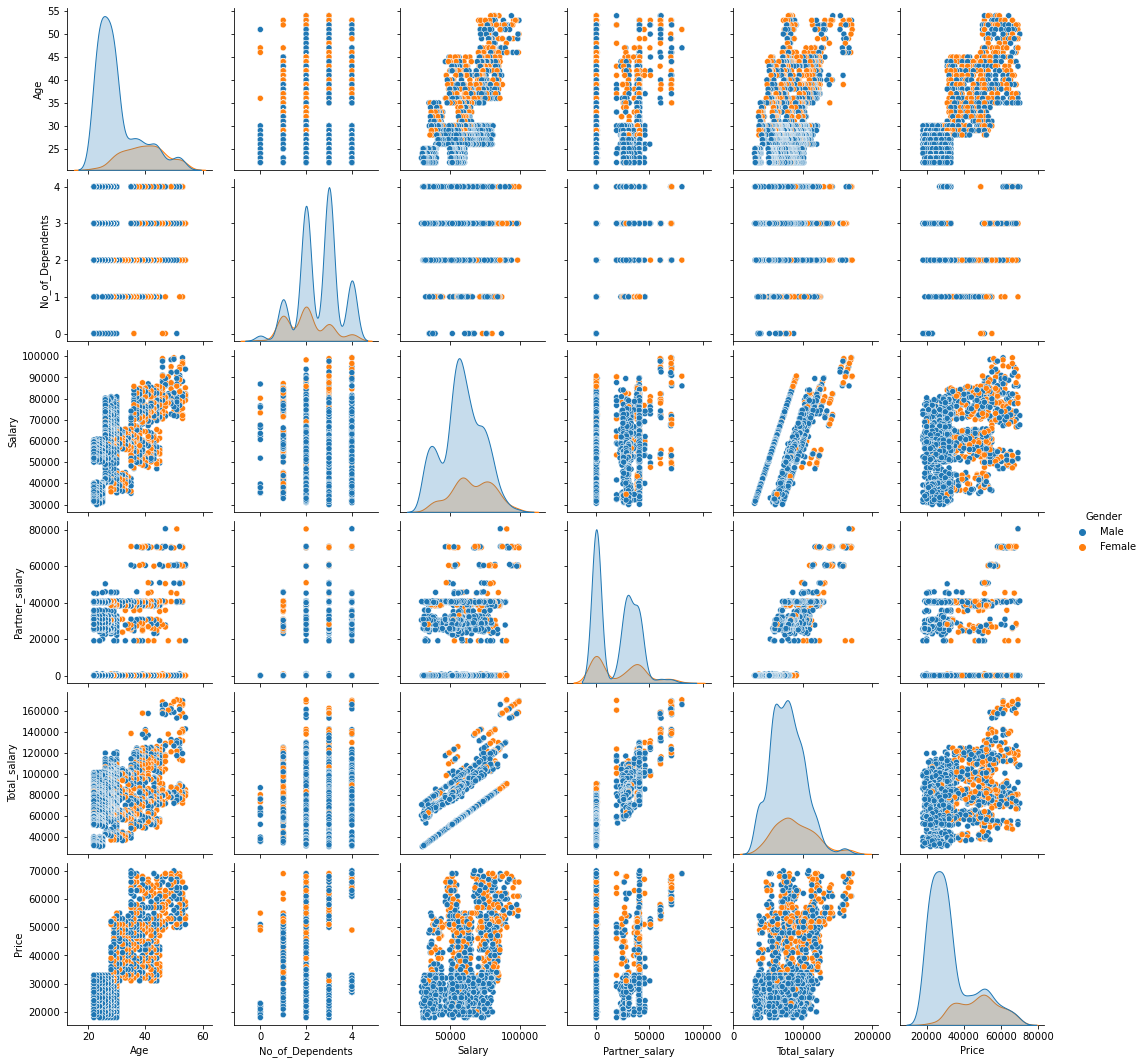

In [126]:
# PAIR PLOT
sns.pairplot(data=df, hue="Gender");

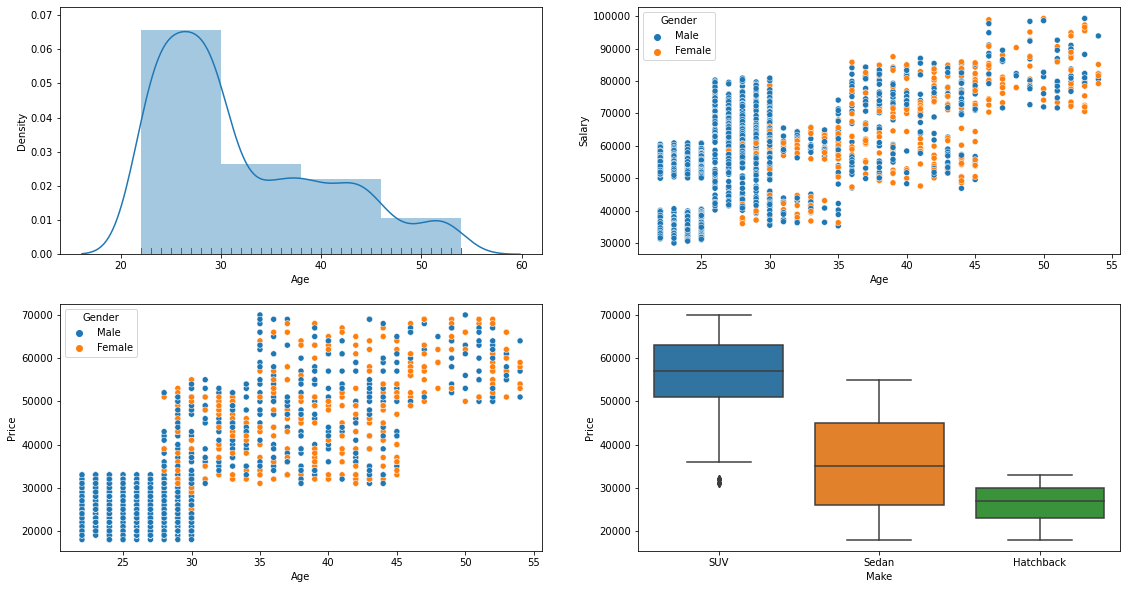

In [194]:
#DETAILED ANALYSIS FOR GENDER
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(19,10)
sns.distplot( a=df['Age'], hist=True, kde=True, rug=True,ax=axes[0][0],bins=4);
sns.scatterplot(x=df['Age'],y=df['Salary'],hue=df['Gender'], ax=axes[0][1]);
sns.scatterplot(x=df['Age'],y=df['Price'],hue=df['Gender'], ax=axes[1][0]);
sns.boxplot(x='Make',y='Price',data=df, ax=axes[1][1]);

#7> Most car owners belong to the age-group 20-30 and are mostly Males.Majority of young males prefer low price (Hatchbacks) car make.
#8> Most female car owners are of 30 or more age group

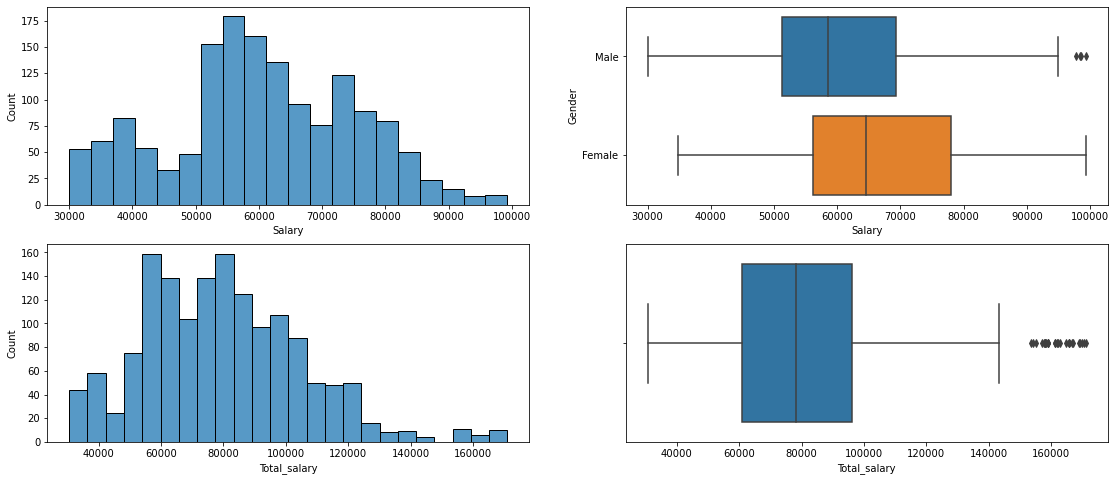

In [195]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(19,8)

sns.histplot(df['Salary'],ax=axes[0][0]);
sns.boxplot(x='Salary',y='Gender',data=df, ax=axes[0][1]);
sns.histplot(df['Total_salary'],ax=axes[1][0]);
sns.boxplot(x='Total_salary',data=df, ax=axes[1][1]);

        Make  Total_Sales($)
0  Hatchback        15371000
1        SUV        16283000
2      Sedan        23389000 

         Make       avg_sal
0  Hatchback  55103.103448
1        SUV  72144.329897
2      Sedan  59998.477930 

         Make   avg_tot_sal
0  Hatchback  71092.586207
1        SUV  96863.230241
2      Sedan  80324.048706


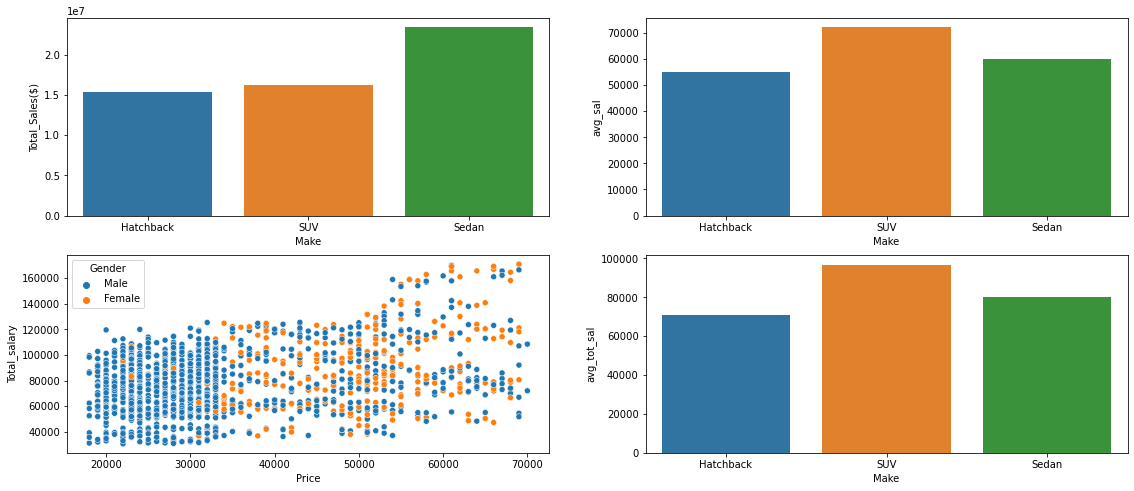

In [196]:
# EDA by aggregating: Grouping the DataFrame df by the "Make" column and summing up / averaging upon various variables

df_sale=df.groupby('Make')['Price'].sum().reset_index();
df_sale = df_sale.rename(columns={'Price': 'Total_Sales($)'});

df_avg_sal=df.groupby('Make')['Salary'].mean().reset_index();
df_avg_sal=df_avg_sal.rename(columns={'Salary':'avg_sal'});

df_avg_tot_sal=df.groupby('Make')['Total_salary'].mean().reset_index();
df_avg_tot_sal=df_avg_tot_sal.rename(columns={'Total_salary':'avg_tot_sal'});

print(df_sale,"\n\n",df_avg_sal,"\n\n",df_avg_tot_sal)

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(19,8)

sns.barplot(x='Make',y='Total_Sales($)',data=df_sale,ax=axes[0][0]);

sns.barplot(x='Make',y='avg_sal',data=df_avg_sal,ax=axes[0][1]);

sns.barplot(x='Make',y='avg_tot_sal',data=df_avg_tot_sal,ax=axes[1][1]);

sns.scatterplot(x='Price',y='Total_salary',data=df,ax=axes[1][0],hue='Gender');

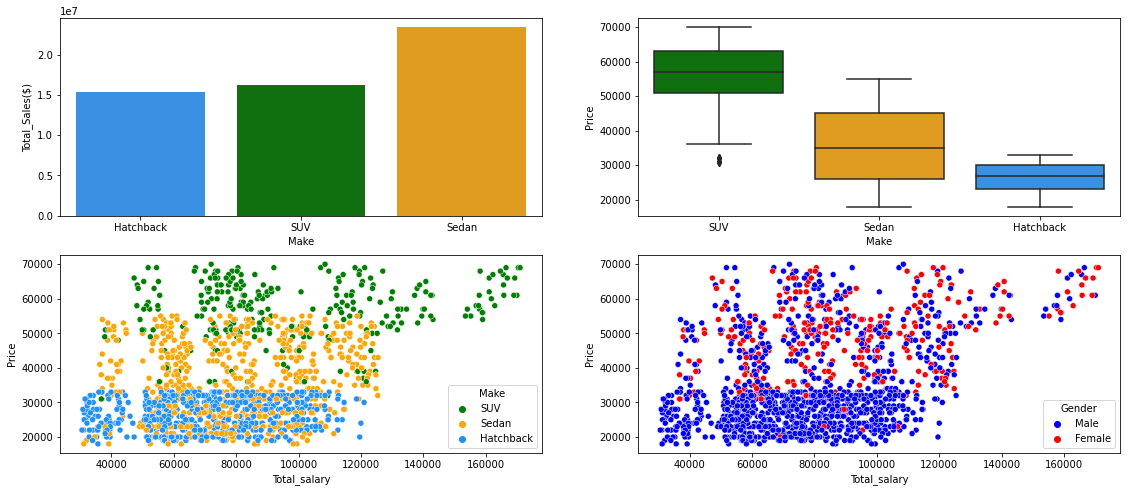

In [197]:
# EDA: Amount spend for Purchasing Automobiles

fig, axes = plt.subplots(nrows=2,ncols=2);
fig.set_size_inches(19,8);

#Graph1- Total Sales Vs Make
df_sale=df.groupby('Make')['Price'].sum().reset_index();
df_sale = df_sale.rename(columns={'Price': 'Total_Sales($)'});
#sns.barplot(x='Make',y='Total_Sales($)',data=df_sale,palette=color_dict,ax=axes[0][0]);

# we specify a color for each continent a Python dictionary.
color_dict = dict({'Hatchback':'dodgerblue','Sedan':'orange','SUV': 'green','Male':'blue','Female': 'red','Married':'grey','Single': 'red','Business':'black','Salaried': 'red'})
#We can use the color dictionary for the argument palette and make scatter plots.

#Graph2- Price Vs Make
sns.boxplot(x='Make',y='Price',data=df,palette=color_dict, ax=axes[0][1]);


sns.barplot(x='Make',y='Total_Sales($)',data=df_sale,palette=color_dict,ax=axes[0][0]);

#Graph3- Price(Make wise) Vs Tot.Salary
sns.scatterplot(y='Price',x='Total_salary',data=df,palette=color_dict,ax=axes[1][0],hue='Make');

#Graph4- Price Vs Tot.Salary(Gender wise)
sns.scatterplot(y='Price',x='Total_salary',data=df,palette=color_dict,ax=axes[1][1],hue='Gender');



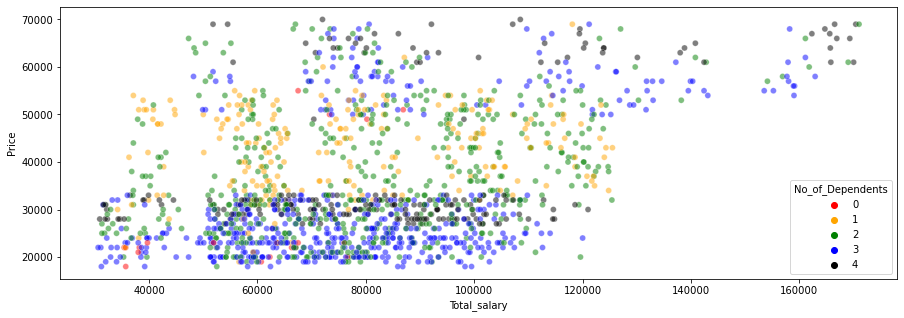

In [198]:
#Graph5- Price Vs Tot.Salary based on Number of dependents
color_dict2 = dict({0:'red',1:'orange',2: 'green',3:'blue',4: 'black'})
plt.figure(figsize=(15,5));
sns.scatterplot(y='Price',x='Total_salary',data=df,hue='No_of_Dependents', palette=color_dict2,alpha=0.5);

### OBSERVATIONS
1. From total_Sales Vs Make graph, its evident that highest amount spent for purchasing automobiles is on Sedan.    
   The amount spent on purchasing SUV and Hatchback is almost the same.However the sales volumes will vary.  

2. The Price Vs Make graph describes the Price range for 3 categories.  
   SUV segment has the highest avg.Price (~$60000) followed by Sedan(~$40000) and hatchback(~$3000)  
   Mid Salaried people prefer Sedan, and Hatchback is prefered by people with comparatively low average salary.  
   Total salary is considered while analysing this.  

3. From Total Salary Vs Price (wrt Make and Gender) graphs following insights are evident -   
   Hatchbacks are prefered mostly by Males  
   SUVs are preferred mostly by higher salary group  

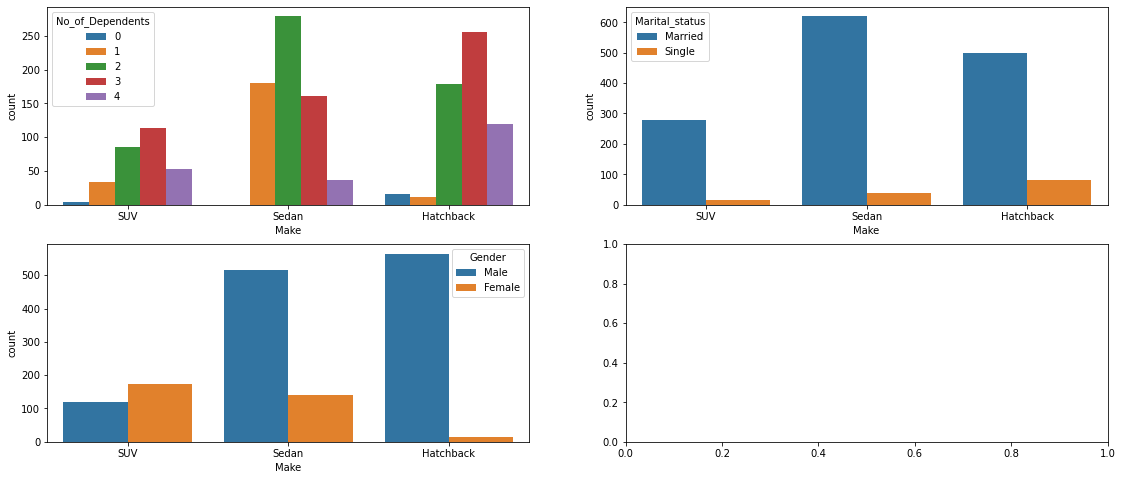

In [199]:
fig, axes = plt.subplots(nrows=2,ncols=2);
fig.set_size_inches(19,8);
sns.countplot(x=df['Make'], hue=df['No_of_Dependents'], ax=axes[0][0]);
sns.countplot(x=df['Make'], hue=df['Marital_status'], ax=axes[0][1]);
sns.countplot(x=df['Make'], hue=df['Gender'], ax=axes[1][0]);

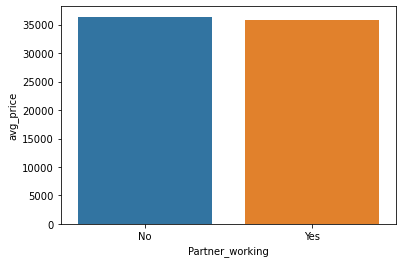

In [171]:
# From the current data set, Checking if having a working partner leads to the purchase of a higher-priced car.

df1=df.groupby(['Partner_working'])['Price'].mean().reset_index()
df1 = df1.rename(columns={'Price': 'avg_price'});
sns.barplot(x='Partner_working',y='avg_price',data=df1);



Its evident from the graph that having a working partner DOES NOT leads to the purchase of a higher-priced car.

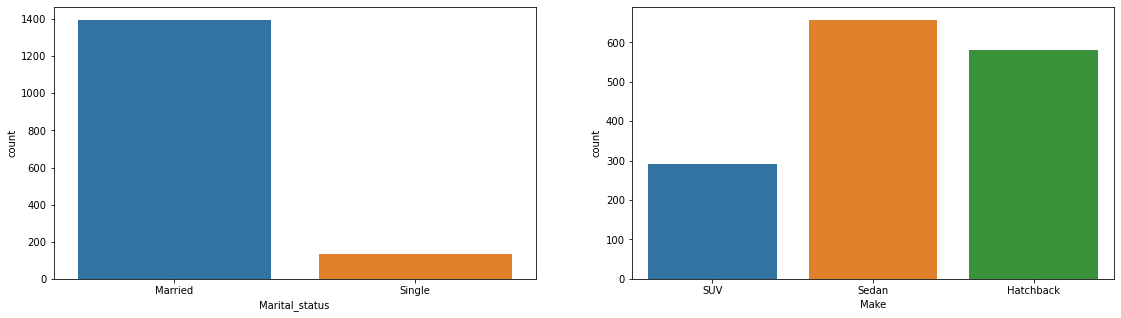

In [201]:
fig, axes = plt.subplots(nrows=1,ncols=2);
fig.set_size_inches(19,5);

sns.countplot(x='Marital_status', data=df, ax=axes[0])

# Convert 'Make' column to numerical categories
# df['Make'] = pd.Categorical(df['Make']).codes

# Create countplot
sns.countplot(x='Make', data=df, ax=axes[1]);


In [202]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [203]:
# Analysis for no.of dependents = 0

df0 = df [ (df['No_of_Dependents']== 0)]
df0.reset_index
df0.head(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
93,51,Male,Salaried,Single,Post Graduate,0,Yes,No,No,86900,0.0,86900,51000,SUV
128,47,Female,Business,Single,Graduate,0,Yes,No,No,73300,0.0,73300,50000,SUV
138,46,Female,Salaried,Single,Post Graduate,0,Yes,No,No,80200,0.0,80200,49000,SUV
462,36,Female,Salaried,Single,Post Graduate,0,No,No,No,67500,0.0,67500,55000,SUV
701,30,Male,Business,Single,Post Graduate,0,Yes,No,No,67000,0.0,67000,22000,Hatchback


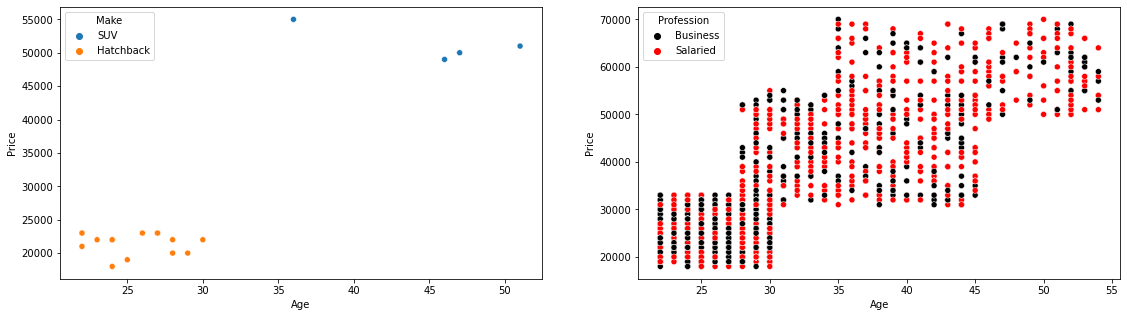

In [204]:
fig, axes = plt.subplots(nrows=1,ncols=2);
fig.set_size_inches(19,5);

sns.scatterplot(x='Age',y='Price',hue="Make",data=df0,ax=axes[0]);
sns.scatterplot(x='Age',y='Price',hue="Profession",palette=color_dict,data=df,ax=axes[1]);

In [205]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


### Patterns in the buyers groups and purchase history which can help to develop an improved Marketing strategy.

Following patterns can be seen in the buyers groups and purchase history which can also help to develop an improved Marketing strategy - 
1) HATCHBACKS are predominently preffered by single Males or married couples with 20-30 yrs bracket which is also the largest group based on data and has a wide Total salary range (20k-120k). This suggests a need of stepping up the marketing campaign for Hatchbacks focussing on youth and young couples.

2) SEDAN has the widest Price range(20k-60k)that overlaps Hatchback and SUV segments also. 
   Married couples with low Total Salary range (~30K) prefer entry level Sedan only upto 30K or Hatchback.
   Singles in the age-group 30-45, prefer costlier varient (>30k) and NOT the base Sedan varient. 
   Hence, for youth, the Hatchback and entry level Sedans can be marketed.
   
3) SUVs are the prefered choice of all age groups (28 to 55). Amongst the SUV owners, the married-Males prefer higher-end (>~50000) SUV varient whereas Female SUV owners prefer lower SUV varient (< ~50000). SUV owners (married or single) more than 45yr of age prefer only higher end SUV varients. Hence for SUVs, the marketing campaigns can be focussed more on Male car owners for higher varient SUVs.  

In [206]:
df_HB=df0[df0['Make']=="Hatchback"].reset_index()

In [207]:
df_HB.head()

,index,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,701,30,Male,Business,Single,Post Graduate,0,Yes,No,No,67000,0.0,67000,22000,Hatchback
1,826,29,Male,Salaried,Single,Post Graduate,0,Yes,Yes,No,62300,0.0,62300,20000,Hatchback
2,912,28,Male,Business,Single,Post Graduate,0,Yes,Yes,No,76600,0.0,76600,20000,Hatchback
3,936,28,Male,Business,Single,Post Graduate,0,No,Yes,No,66300,0.0,66300,22000,Hatchback
4,1020,27,Male,Salaried,Single,Post Graduate,0,No,No,No,76000,0.0,76000,23000,Hatchback


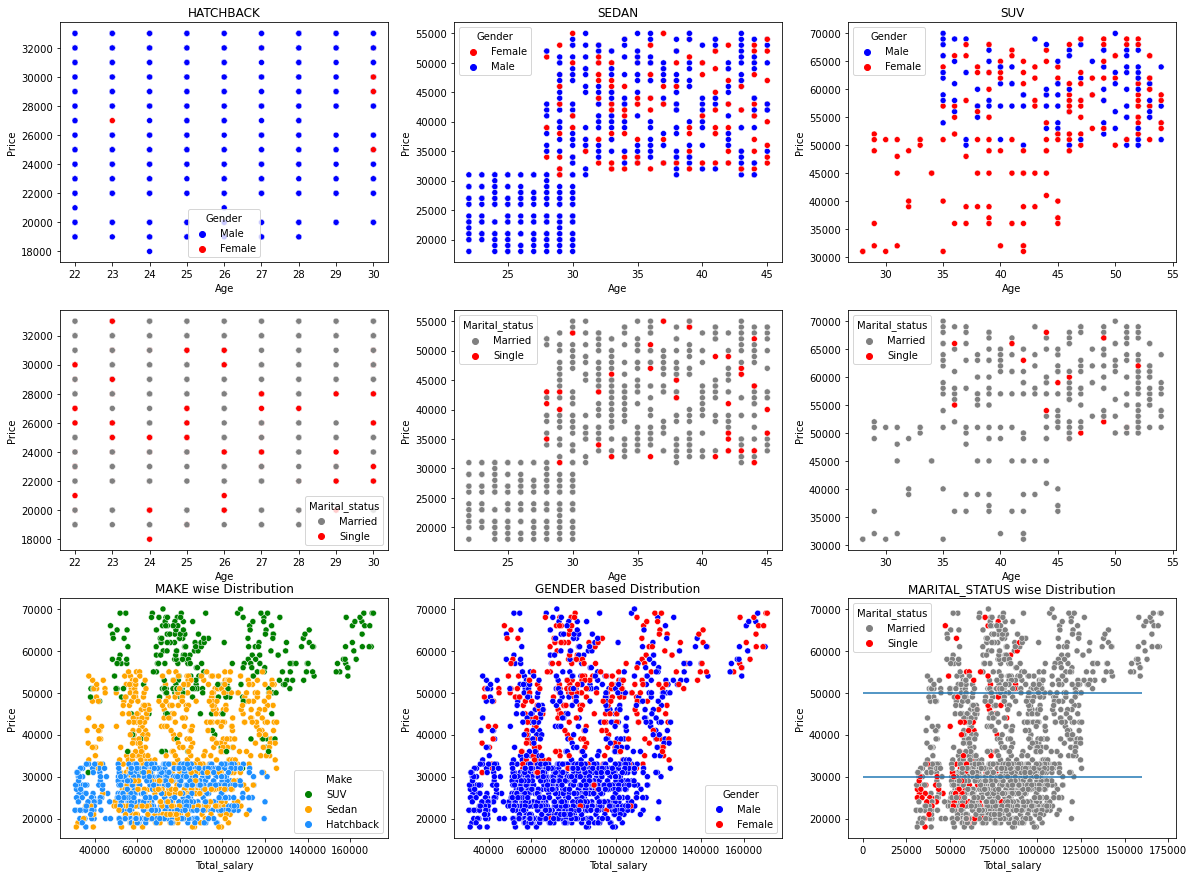

In [208]:

df_HB=df[df['Make']=="Hatchback"].reset_index()
df_SD=df[df['Make']=="Sedan"].reset_index()
df_SUV=df[df['Make']=="SUV"].reset_index()

fig, axes = plt.subplots(nrows=3,ncols=3);
fig.set_size_inches(20,15);

#Plots Price Vs Age (Filter: Make)
sns.scatterplot(x='Age',y='Price',hue="Gender",palette=color_dict,data=df_HB,ax=axes[0][0],).set(title='HATCHBACK');
sns.scatterplot(x='Age',y='Price',hue="Gender",palette=color_dict,data=df_SD,ax=axes[0][1]).set(title='SEDAN');
sns.scatterplot(x='Age',y='Price',hue="Gender",palette=color_dict,data=df_SUV,ax=axes[0][2]).set(title='SUV');

#Plots Price Vs Age (Filter: Marital status)
sns.scatterplot(x='Age',y='Price',hue="Marital_status",palette=color_dict,data=df_HB,ax=axes[1][0]);
sns.scatterplot(x='Age',y='Price',hue="Marital_status",palette=color_dict,data=df_SD,ax=axes[1][1]);
sns.scatterplot(x='Age',y='Price',hue="Marital_status",palette=color_dict,data=df_SUV,ax=axes[1][2]);

#Plot- Price(Make wise) Vs Tot.Salary
sns.scatterplot(y='Price',x='Total_salary',data=df,palette=color_dict,ax=axes[2][0],hue='Make').set(title='MAKE wise Distribution');

plt.hlines(30000,xmin = 0,xmax=160000)
plt.hlines(50000,xmin = 0,xmax=160000)

#Plot- Price Vs Tot.Salary(Gender wise)
sns.scatterplot(y='Price',x='Total_salary',data=df,palette=color_dict,ax=axes[2][1],hue='Gender').set(title='GENDER based Distribution');

#Plot- Price Vs Tot.Salary(Marital status wise)
sns.scatterplot(y='Price',x='Total_salary',data=df,palette=color_dict,ax=axes[2][2],hue='Marital_status').set(title='MARITAL_STATUS wise Distribution');

In [210]:
#pd.DataFrame(df_SUV.groupby(['Gender','Profession']).value_counts())
df_SUV2=df_SUV[['Gender','Profession','Make']]
df_SUV2.head(5)

,Gender,Profession,Make
0,Male,Business,SUV
1,Female,Salaried,SUV
2,Female,Salaried,SUV
3,Female,Salaried,SUV
4,Male,Salaried,SUV


SEDAN Owners 
 Profession  Business  Salaried
Gender                        
Female            50        91
Male             237       279


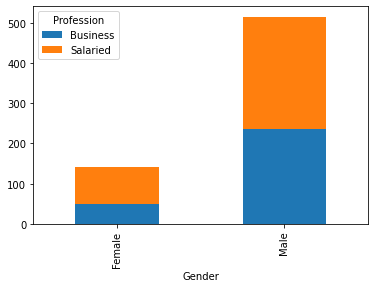

In [211]:
df_SD2=df_SD[['Gender','Profession','Make']]
df_plot_SD = df_SD2.groupby(['Gender', 'Profession'])['Make'].size().reset_index().pivot(columns='Profession', index='Gender', values='Make')
print("SEDAN Owners","\n", df_plot_SD)
df_plot_SD.plot(kind='bar', stacked=True);

SUV Owners 
 Profession  Business  Salaried
Gender                        
Female            55       118
Male              33        85


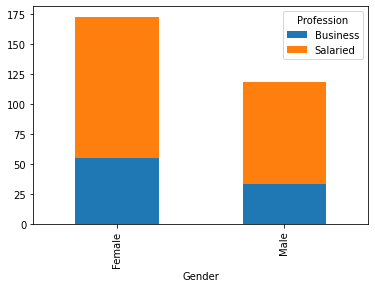

In [212]:
df_plot = df_SUV2.groupby(['Gender', 'Profession']).size().reset_index().pivot(columns='Profession', index='Gender', values=0)
print("SUV Owners","\n", df_plot)
df_plot.plot(kind='bar', stacked=True);